In [72]:
import hes1_langevin_Antoine as langevin
import hes1_master_Antoine as master
import hes1_utils_Antoine as utils

import hes1_utils_general as general
# import jochen_utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as spinter
import scipy.fft
import time
import datetime as dt
import os

import time

import warnings
warnings.filterwarnings("ignore")

In [73]:
# font = {
    # 'family' : 'Arial',
    # 'color'  : 'black',
    # 'weight' : 'normal',
    # 'size'   : 22,
# }
# legendFont = 14
font = {'size'   : 8,
        'sans-serif' : 'Arial'}
plt.rc('font', **font)

# ratio=(1+np.sqrt(5))/2

# Plotting power spectrum

Name hereafter the directory you want to use for the plots

In [74]:
# read_directory = 'paper plots 2024-4-27-0-42-48 mean-std-power-spectrum'
read_directory = ''
# read_directory = os.path.join(os.getcwd(),'paper_plots_mean-std-power-spectrum') 
# write_directory = 'power_spectra_plots'

In [75]:
spec = pd.read_csv(os.path.join(read_directory,'data','spec.csv'))['value'].values
paramPoint=pd.read_csv(os.path.join(read_directory,'data','paramPoint-spectrum.csv'))['value'].values
t_ref=pd.read_csv(os.path.join(read_directory,'data','t-spectrum.csv'))['value'].values
freq_ref=pd.read_csv(os.path.join(read_directory,'data','freq-spectrum.csv'))['value'].values

power_spectrum_Mm=pd.read_csv(os.path.join(read_directory,'data','power-spectrum-Mm.csv'))['value'].values
power_spectrum_Pm=pd.read_csv(os.path.join(read_directory,'data','power-spectrum-Pm.csv'))['value'].values
power_spectrum_Ml=pd.read_csv(os.path.join(read_directory,'data','power-spectrum-Ml.csv'))['value'].values
power_spectrum_Pl=pd.read_csv(os.path.join(read_directory,'data','power-spectrum-Pl.csv'))['value'].values
power_spectrum_Mlna=pd.read_csv(os.path.join(read_directory,'data','power-spectrum-Mlna.csv'))['value'].values
power_spectrum_Plna=pd.read_csv(os.path.join(read_directory,'data','power-spectrum-Plna.csv'))['value'].values

In [76]:
[alpha_m, alpha_p, mu_m, mu_p, h, P_0, T, delta_t] = spec
[valueOfLambda, valueOfOmega, valueOfTau, sampling_timestep] = paramPoint

In [77]:
# F_dash = blabla
# delta_square =mu_M*mu_P-alpha_m*alpha_p*\cos(\omega\tau)-\omega^2\right]^2+\left[\omega(\mu_M+\mu_P)+\alpha_M\alpha_P F'(x_P^*)\sin(\omega\tau)\right]^

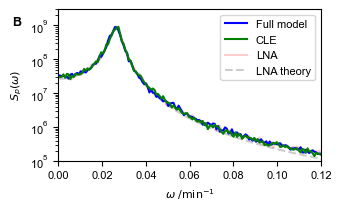

In [78]:
fig = plt.figure(figsize=(3.3,2.0), constrained_layout = True) 

ax1 = plt.gca()

# ax1.set_title('Hes1 Power spectrum',fontdict=font) 
# ax1.set_xlabel('Angular frequency') 
ax1.set_xlabel('$\omega$ $/\mathrm{min}^{-1}$') 
# ax1.set_ylabel('Power') 
ax1.set_ylabel('$S_p(\omega)$') 



freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=valueOfLambda,
                                                tau=valueOfTau,
                                                Omega=valueOfOmega,
                                                T=T,
                                                delta_t=sampling_timestep)

fig.text(0.02, 0.9, 'B', size=9, weight='bold')
linelna,=ax1.plot(freq_ref[1:], power_spectrum_Plna[1:], color = 'red', alpha = 0.2)
linet,=ax1.plot(freq_th[1:], Sp[1:], '--', color = 'black', alpha = 0.2)
linem,=ax1.plot(freq_ref[1:], power_spectrum_Pm[1:], color = 'blue')
linel,=ax1.plot(freq_ref[1:], power_spectrum_Pl[1:], color = 'green')

ax1.tick_params(axis ='y') 
ax1.set_yscale('log')        
ax1.legend([linem, linel, linelna, linet], ['Full model', 'CLE', 'LNA', 'LNA theory'], fontsize = 8)

ax1.set_xlim(0, 0.12)
ax1.set_ylim(10**5, 3*10**9)


plt.savefig(os.path.join(read_directory,'plots','lpowerSpectrum-lambda'+str(valueOfLambda)[0:4]+'-Omega'+ str(valueOfOmega)
                                                                              +'-tau'+ str(valueOfTau)  +'.pdf'))  
plt.show()

# Plotting mean & STD

In [79]:
val_lambda=pd.read_csv(os.path.join(read_directory,'data','lambda.csv'))['value'].values
val_Omega=pd.read_csv(os.path.join(read_directory,'data','Omega.csv'))['value'].values
val_tau=pd.read_csv(os.path.join(read_directory,'data','tau.csv'))['value'].values
index=pd.read_csv(os.path.join(read_directory,'data','index.csv'))['value'].values

arr_std_Mm=pd.read_csv(os.path.join(read_directory,'data','std-Mm.csv'))['value'].values
arr_std_Pm=pd.read_csv(os.path.join(read_directory,'data','std-Pm.csv'))['value'].values
arr_std_Ml=pd.read_csv(os.path.join(read_directory,'data','std-Ml.csv'))['value'].values
arr_std_Pl=pd.read_csv(os.path.join(read_directory,'data','std-Pl.csv'))['value'].values
arr_std_Mlna=pd.read_csv(os.path.join(read_directory,'data','std-Mlna.csv'))['value'].values
arr_std_Plna=pd.read_csv(os.path.join(read_directory,'data','std-Plna.csv'))['value'].values

In [80]:
n_lambda=np.size(val_lambda)
n_Omega=np.size(val_Omega)
n_tau=np.size(val_tau)
[j,k] = index

In [81]:
arr_std_th_Plna=np.zeros(n_lambda)

for i in range(n_lambda):
    
    valueOfLambda = val_lambda[i]
    valueOfOmega = val_Omega[j]
    valueOfTau = val_tau[k]
    
    freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=valueOfLambda,
                                                tau=valueOfTau,
                                                Omega=valueOfOmega,
                                                T=T,
                                                delta_t=sampling_timestep)
    dfreq = freq_th[1]-freq_th[0]
    arr_std_th_Plna[i] = np.sqrt(sum(Sp[1:])*dfreq/np.pi)

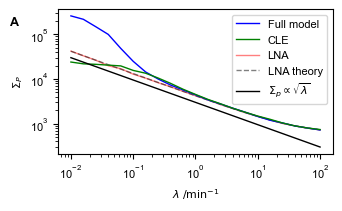

In [98]:
# fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 
fig = plt.figure(figsize=(3.3,2.0), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_xlabel('$\lambda$ $/\mathrm{min}^{-1}$') 
ax1.set_ylabel('$\Sigma_P$')

straight_line = 3e3/np.sqrt(val_lambda)

linelna,=ax1.plot(val_lambda, arr_std_Plna, color = 'red', alpha = 0.5, lw = 1.0)
linet,=ax1.plot(val_lambda, arr_std_th_Plna,'--', color = 'black', alpha = 0.5, lw = 1.0)
linem,=ax1.plot(val_lambda, arr_std_Pm, color = 'blue', lw = 1.0)
linel,=ax1.plot(val_lambda, arr_std_Pl, color = 'green', lw =1.0)
lines,=ax1.plot(val_lambda, straight_line, color = 'black', lw =1.0)

ax1.tick_params(axis ='y')
ax1.legend([linem, linel, linelna, linet,lines], ['Full model', 'CLE', 'LNA', 'LNA theory', '$\Sigma_p \propto \sqrt{\lambda}$'], fontsize = 8)
ax1.set_xscale('log')
ax1.set_yscale('log')        

#ax1.set_xlim(1,100)
#ax1.set_ylim(1.5*10**3, 6*10**3)
fig.text(0.01, 0.9, 'A', size=9, weight='bold')


plt.savefig(os.path.join(read_directory ,'plots','std-plots-Omega' + str(val_Omega[j]) + '-tau' + str(val_tau[k]) + '.pdf'))
plt.show()

In [83]:
arr_rel_Pl = abs(arr_std_Pm - arr_std_Pl)/arr_std_Pm
arr_rel_Plna = abs(arr_std_Pm - arr_std_Plna)/arr_std_Pm
arr_rel_th_Plna = abs(arr_std_Pm - arr_std_th_Plna)/arr_std_Pm

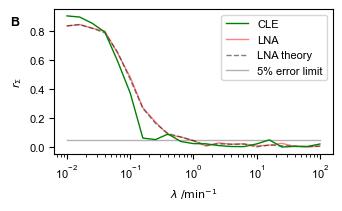

In [97]:
# fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 
fig = plt.figure(figsize=(3.3,2.0), constrained_layout = True) 

ax1 = plt.gca()

# ax1.set_title('Hes1 concentration STD relative error against lambda',fontdict=font) 
ax1.set_xlabel('$\lambda$') 
ax1.set_xlabel('$\lambda$ $/\mathrm{min}^{-1}$') 
ax1.set_ylabel('$r_\Sigma$')

linelim,=ax1.plot([0.01,100], [0.05, 0.05], color = 'grey', alpha = 0.6, lw = 1.0)
linelna,=ax1.plot(val_lambda, arr_rel_Plna, color = 'red', alpha = 0.5, lw = 1.0)
linet,=ax1.plot(val_lambda, arr_rel_th_Plna, '--', color = 'black', alpha = 0.5, lw = 1.0)
linel,=ax1.plot(val_lambda, arr_rel_Pl, color = 'green', lw =1.0)

ax1.legend([linel, linelna, linet,linelim], ['CLE', 'LNA', 'LNA theory', '5% error limit'], loc='upper right', fontsize = 8)

ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
#ax1.set_yscale('log')        

#ax1.set_xlim(0, 0.15)
#ax1.set_ylim(5*10**(-4), 2)
fig.text(0.01, 0.9, 'B', size=9, weight='bold')

plt.savefig(os.path.join(read_directory,'plots','error-std-plots-Omega' + str(val_Omega[j]) + '-tau' + str(val_tau[k]) + '.pdf'))
plt.show()